In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from methods import *

C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
raw_data=pd.read_excel('Book2.xlsx',sheet_name='Sheet2').T
raw_data.reset_index(drop=True,inplace=True)
#raw_data=raw_data[:-4]
#raw_data.dropna(inplace=True,axis=1)
raw_data.rename(columns={"BG VALUE (MG/DL)": "BG VAL"},inplace=True)
raw_data
#raw_data.tail(10)

,BG VAL,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,108,181,181,180,180,176,176,176,177,177,...,157,156,156,154,155,155,237,155,153,152
1,126,265,244,233,237,229,228,229,235,230,...,159,176,175,174,166,170,182,182,181,179
2,120,165,159,152,148,153,156,152,146,152,...,178,178,178,179,177,176,184,184,186,187
3,208,137,133,129,128,128,129,130,132,130,...,139,139,137,135,133,131,132,130,131,129
4,91,216,213,211,211,211,211,207,205,206,...,182,181,183,165,162,162,160,161,160,161
5,94,783,851,857,850,854,856,852,852,854,...,756,757,762,757,738,742,741,747,744,742
6,321,225,216,215,214,214,211,210,208,207,...,218,219,220,220,222,221,222,225,224,225
7,104,208,205,199,196,194,180,174,175,175,...,194,192,192,192,192,193,193,193,194,193
8,208,232,229,230,230,230,231,231,231,197,...,172,172,172,172,172,172,172,172,172,172
9,195,77,82,81,83,83,83,140,560,620,...,631,630,628,629,630,634,634,632,632,631


In [27]:
X,y=raw_data.drop(['BG VAL'],axis=1),raw_data['BG VAL']
random_state=42

In [28]:
summary_data=gen_summary_data(X)
summary_data.drop(['min','mode','max-min'],axis=1,inplace=True)
summary_data.head(3)

,avg,std
0,162.5375,11.841724
1,225.3000,33.349473
2,179.9750,31.804774


In [29]:
x_train,x_test,y_train,y_test=train_test_split(summary_data,y,test_size=0.1,random_state=random_state)

**Model name:  LinearRegression
[165.46481668 161.86791244 166.1450317  166.20272136 166.27155565
 164.02633318 147.11281061 155.80348496]
 ERROR MEASURES 
Root Mean Squared Error:  57.063645765571614
Mean Absolute Error:  50.285962083284886
Mean Absolute Percent Error:  30.663466703414677
R2 score:  -78.41162460707677


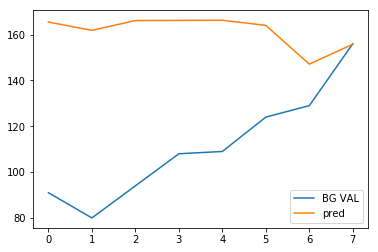

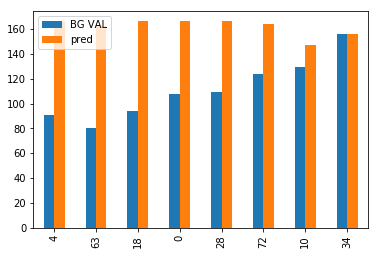

,BG VAL,pred
4,91,165.464817
63,80,161.867912
18,94,166.145032
0,108,166.202721
28,109,166.271556
72,124,164.026333
10,129,147.112811
34,156,155.803485


**Model name:  RandomForestRegressor
[238.  239.4 185.9 152.4 188.6 152.7 160.  134.5]
 ERROR MEASURES 
Root Mean Squared Error:  90.84150345519387
Mean Absolute Error:  75.4375
Mean Absolute Percent Error:  37.90971853371447
R2 score:  -5.022444788591026


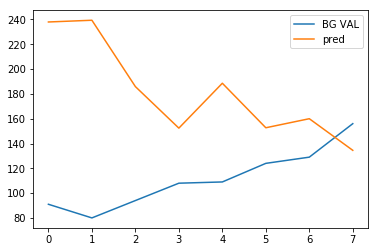

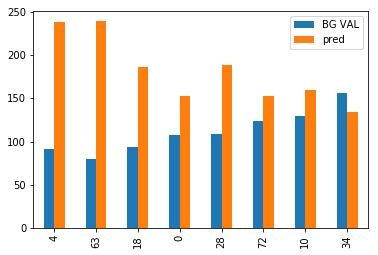

,BG VAL,pred
4,91,238.0
63,80,239.4
18,94,185.9
0,108,152.4
28,109,188.6
72,124,152.7
10,129,160.0
34,156,134.5


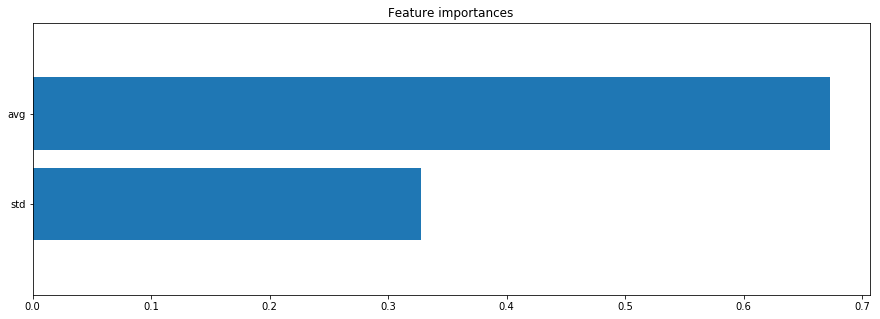

**Model name:  GradientBoostingRegressor
[313.90610127 240.35656671 114.25570404 143.75933052 140.22890234
 125.56282881 128.03031461 124.28535224]
 ERROR MEASURES 
Root Mean Squared Error:  99.42008579904953
Mean Absolute Error:  63.09422085612422
Mean Absolute Percent Error:  28.764874202462202
R2 score:  -1.1930114076083842


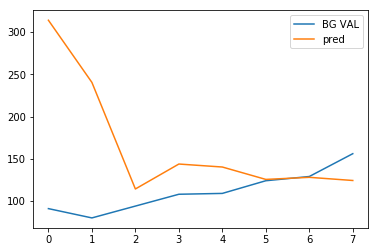

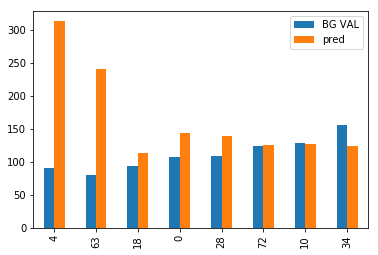

,BG VAL,pred
4,91,313.906101
63,80,240.356567
18,94,114.255704
0,108,143.759331
28,109,140.228902
72,124,125.562829
10,129,128.030315
34,156,124.285352


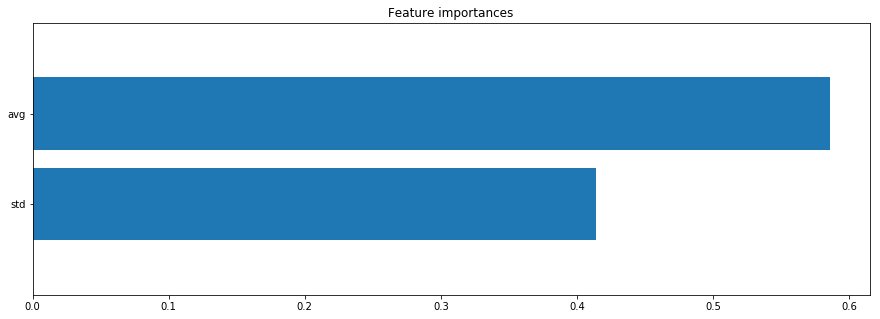

**Model name:  KNeighborsRegressor
[208.  173.8 142.6 132.8 209.4 148.2 161.8 147. ]
 ERROR MEASURES 
Root Mean Squared Error:  68.27067452427873
Mean Absolute Error:  56.325
Mean Absolute Percent Error:  31.705789252201843
R2 score:  -5.16187042037526


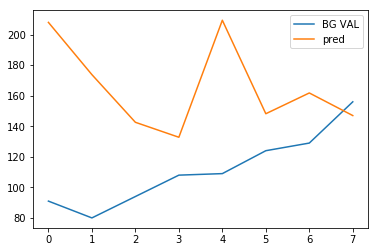

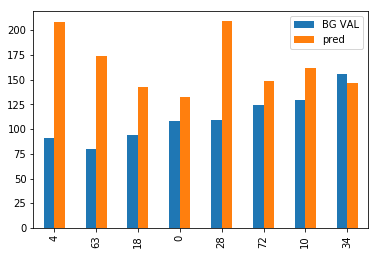

,BG VAL,pred
4,91,208.0
63,80,173.8
18,94,142.6
0,108,132.8
28,109,209.4
72,124,148.2
10,129,161.8
34,156,147.0


**Model name:  AdaBoostRegressor
[225.14285714 228.55882353 156.52173913 169.11111111 199.78571429
 170.93333333 142.81818182 131.9       ]
 ERROR MEASURES 
Root Mean Squared Error:  85.82256534627565
Mean Absolute Error:  72.74647004388054
Mean Absolute Percent Error:  37.68822766213092
R2 score:  -5.40032551035602


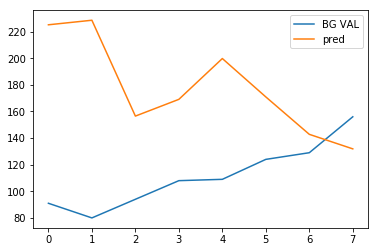

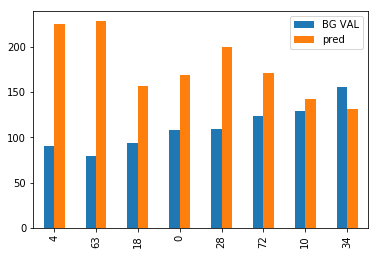

,BG VAL,pred
4,91,225.142857
63,80,228.558824
18,94,156.521739
0,108,169.111111
28,109,199.785714
72,124,170.933333
10,129,142.818182
34,156,131.900000


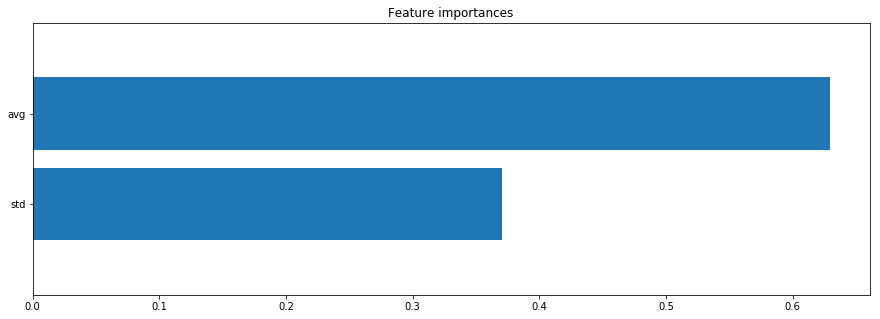

**Model name:  MLPRegressor
[ 53.5274618   92.56234331  89.90109585  45.76074822  54.5772343
  71.51510706 242.26220405 167.29798924]
 ERROR MEASURES 
Root Mean Squared Error:  54.914708760654
Mean Absolute Error:  43.48011117142623
Mean Absolute Percent Error:  56.34493313181873
R2 score:  0.2658963087941517


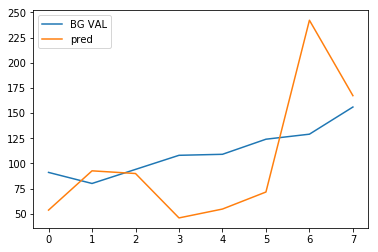

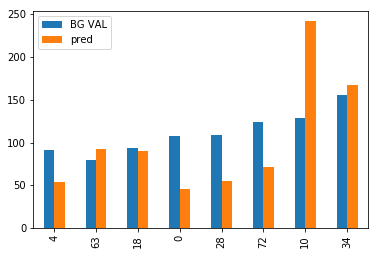

,BG VAL,pred
4,91,53.527462
63,80,92.562343
18,94,89.901096
0,108,45.760748
28,109,54.577234
72,124,71.515107
10,129,242.262204
34,156,167.297989


array([0.62916394, 0.37083606])

In [30]:
clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]   
get_model_prediction(x_train,y_train,x_test,y_test,clf_models,True,True)

## Linear Coefficient 

### Using 90% of data

 ERROR MEASURES 
Root Mean Squared Error:  57.063645765571614
Mean Absolute Error:  50.285962083284886
Mean Absolute Percent Error:  30.663466703414677
R2 score:  -78.41162460707677


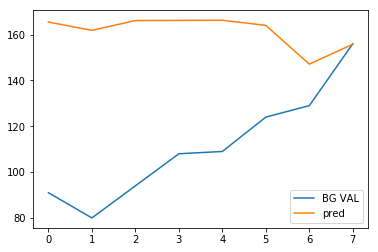

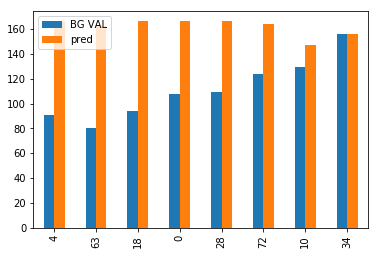

,BG VAL,pred
4,91,165.464817
63,80,161.867912
18,94,166.145032
0,108,166.202721
28,109,166.271556
72,124,164.026333
10,129,147.112811
34,156,155.803485


the intercept of the linear model is 170.26975011844132
The coefficient for avg is -0.02682604556570951
The coefficient for std is 0.024760720833082405


In [31]:
model = LinearRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
clf_metrics=acc_score(y_test,pred)
plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

### Using all the data

In [32]:
model = LinearRegression()
model.fit(summary_data, y)
#pred=model.predict(x_test)
#clf_metrics=acc_score(y_test,pred)
#plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

the intercept of the linear model is 154.07175604484945
The coefficient for avg is -0.005728940278450541
The coefficient for std is 0.035853368756547176


## load test data

In [ ]:
new_data=pd.read_excel('STANDARDS-WEARABLE-NATRAJ PREDICTION.xlsx',sheet_name='PREDICTION-DETAILS',header=None,
                      usecols="G", na_values=['Orig ADC']).dropna().T
y_test=new_data[0]
x_test=new_data.drop([0],axis=1)
test_data=gen_summary_data(x_test)
test_data.head(3)

In [ ]:
clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            SGDRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]
get_model_prediction(summary_data,y,test_data,None,clf_models)
print('Actual Glucose Level',y_test)